In [2]:
## NOTE: This is Python 3 code.
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt # NOTE: This was tested with matplotlib v. 2.1.0

In [3]:
#########################
#
# Data Generation Code
#
#########################
## In this example, the data is in a data frame called data.
## Columns are individual samples (i.e. cells)
## Rows are measurements taken for all the samples (i.e. genes)
## Just for the sake of the example, we'll use made up data...
genes = ['gene' + str(i) for i in range(1,101)]

wt = ['wt' + str(i) for i in range(1,6)]
ko = ['ko' + str(i) for i in range(1,6)]

data = pd.DataFrame(columns=[*wt, *ko], index=genes)

for gene in data.index:
    data.loc[gene,'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
    data.loc[gene,'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)

print(data.head())

       wt1  wt2  wt3  wt4  wt5  ko1  ko2  ko3  ko4  ko5
gene1  903  942  943  960  889  234  244  239  271  245
gene2  228  274  272  238  270   33   44   44   48   42
gene3  862  880  848  861  889  145  135  148  143  147
gene4  121  105   98   99   97  775  755  804  838  807
gene5  469  456  479  442  428  530  501  543  501  565


In [5]:
print(data.shape)

(100, 10)


In [6]:
#########################
#
# Perform PCA on the data
#
#########################
# First center and scale the data
scaled_data = preprocessing.scale(data.T)

pca = PCA() # create a PCA object
pca.fit(scaled_data) # do the math
pca_data = pca.transform(scaled_data) # get PCA coordinates for scaled_data

/Users/manishanker.talusani/.b/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  import sys


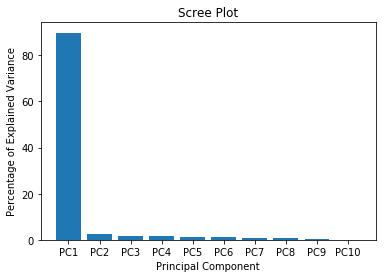

In [7]:
#########################
#
# Draw a scree plot and a PCA plot
#
#########################

#The following code constructs the Scree plot
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

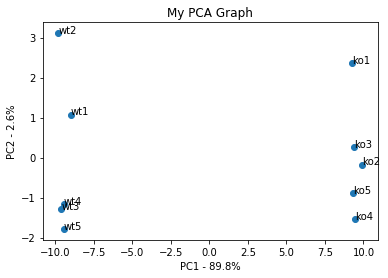

In [8]:
#the following code makes a fancy looking plot using PC1 and PC2
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)

plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))

plt.show()

In [9]:
#########################
#
# Determine which genes had the biggest influence on PC1
#
#########################

## get the name of the top 10 measurements (genes) that contribute
## most to pc1.
## first, get the loading scores
loading_scores = pd.Series(pca.components_[0], index=genes)
## now sort the loading scores based on their magnitude
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)

# get the names of the top 10 genes
top_10_genes = sorted_loading_scores[0:10].index.values

## print the gene names and their scores (and +/- sign)
print(loading_scores[top_10_genes])

gene3     -0.105446
gene33    -0.105437
gene100   -0.105431
gene78    -0.105431
gene34    -0.105430
gene63     0.105423
gene69     0.105418
gene66    -0.105384
gene75     0.105351
gene24    -0.105348
dtype: float64
